<hr>
<div style="text-align: right"> 
    <b style="color:green" > 2 DNI 2</b>
    <br>
    <b style="color:green" > 2021-2022 </b>
</div>

<div style="text-align:  left"> 
    <i>
        <b style="color:green">ISITCOM </b>
    </i>
   
</div>


# <center > Compte rendu  </center>
## <center style="color:red">  TP 3 Intégration numérique </center>

<hr>

### <span style="color:red">  La méthode des Rectangles  </span>

Le principe de cette technique est illustré dans la figure 
L’expression de l’intégrale devient :

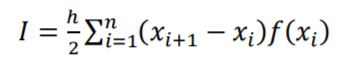

On considère le point milieu de chaque sous intervalle pour augmenter la précision.
L’expression de l’intégrale devient dans ce cas :

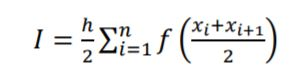



In [10]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from numpy import *
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [11]:
class RectangleG ( object ) :
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        _=plt.plot ( xlist_fine , yflist_fine )
        _=plt.plot(xl, yl,"bo")
        _=plt.xlabel ( 'x' )
        _=plt.ylabel ( ' f ( x ) ' )
        _=plt.title ( ' Methode des rectangles gauches' )
        #plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )
        plt.show()

### <span style="color:red">  La méthode des Trapèzes
  </span>

Le principe de l’approximation d’une intégrale par la méthode des trapèzes est
illustré dans la figure(III.2).
La formule générale de l’intégrale par la méthode des trapèzes s’écrit :



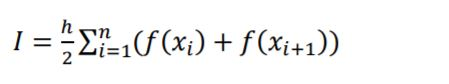

In [6]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,"m")
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"cs")#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes' )
        #plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [7]:
from scipy.integrate import quad

In [8]:
@interact(methode=['Trapèze','Rectangle'],
          a=-np.pi,b=np.pi,
          n=[5,25,50],
          f={'f(x)=sin(x)':lambda x:np.sin(x),'g(x)=x**2+x-1':lambda x:x**2+x-1})
def test(methode,a,b,n,f):
    I = quad(f, a, b)[0]
    meth={'Trapèze':Trapezoidal,'Rectangle':RectangleG}
    M=meth[methode](a,b,n,f)
    print('l'' intégrale avec la méthode {}= {}'.format(methode,M.integrate(f)))
    print('l'' erreur d''intégration = {}'.format(I-M.integrate(f)))
    M.Graph(f)
    plt.show()

interactive(children=(Dropdown(description='methode', options=('Trapèze', 'Rectangle'), value='Trapèze'), Floa…

In [9]:
plt.show()